In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
players_df = pd.read_csv('./datasets/players.csv')
teams_df = pd.read_csv('./datasets/teams.csv')

# Preview the datasets
print("Players Data Overview:")
print(players_df.info())
print(players_df.head(), "\n")

print("Teams Data Overview:")
print(teams_df.info())
print(teams_df.head(), "\n")

Players Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      488 non-null    int64  
 1   Name    488 non-null    object 
 2   Team    488 non-null    object 
 3   Age     488 non-null    int64  
 4   GP      488 non-null    int64  
 5   W       488 non-null    int64  
 6   L       488 non-null    int64  
 7   Min     488 non-null    float64
 8   PTS     488 non-null    float64
 9   FGM     488 non-null    float64
 10  FGA     488 non-null    float64
 11  FG%     488 non-null    float64
 12  3PM     488 non-null    float64
 13  3PA     488 non-null    float64
 14  3P%     488 non-null    float64
 15  FTM     488 non-null    float64
 16  FTA     488 non-null    float64
 17  FT%     488 non-null    float64
 18  OREB    488 non-null    float64
 19  DREB    488 non-null    float64
 20  REB     488 non-null    float64
 21  AST     488 non-

In [3]:
# Ensure uniqueness of teams in both datasets
print("\nUnique teams in Players Dataset:", players_df['Team'].unique())
print("Unique teams in Teams Dataset:", teams_df['Team'].unique())

# Check for duplicates and drop them
print("\nDuplicates in Players Dataset:", players_df.duplicated().sum())
print("Duplicates in Teams Dataset:", teams_df.duplicated().sum())
players_df = players_df.drop_duplicates()
teams_df = teams_df.drop_duplicates()


Unique teams in Players Dataset: ['MIL' 'CHA' 'OKC' 'DEN' 'ORL' 'BOS' 'LAL' 'DAL' 'SAC' 'MIN' 'PHX' 'PHI'
 'NYK' 'BKN' 'CLE' 'MIA' 'DET' 'SAS' 'LAC' 'TOR' 'NOP' 'GSW' 'MEM' 'CHI'
 'ATL' 'WAS' 'IND' 'UTA' 'HOU' 'POR']
Unique teams in Teams Dataset: ['CLE' 'BOS' 'OKC' 'HOU' 'ORL' 'MEM' 'GSW' 'DAL' 'DEN' 'LAL' 'NYK' 'PHX'
 'LAC' 'MIA' 'MIL' 'SAS' 'ATL' 'MIN' 'BKN' 'IND' 'SAC' 'DET' 'POR' 'CHI'
 'CHA' 'TOR' 'PHI' 'UTA' 'NOP' 'WAS']

Duplicates in Players Dataset: 0
Duplicates in Teams Dataset: 0


In [4]:
# # Missing values
# print("\nMissing Values in Players Dataset:")
# print(players_df.isnull().sum())
# print("\nMissing Values in Teams Dataset:")
# print(teams_df.isnull().sum())
#
# # Fill missing values (example: fill numeric with median, categorical with mode)
# players_df.fillna(players_df.median(numeric_only=True), inplace=True)
# teams_df.fillna(teams_df.median(numeric_only=True), inplace=True)
# players_df.fillna(players_df.mode().iloc[0], inplace=True)
# teams_df.fillna(teams_df.mode().iloc[0], inplace=True)

In [5]:
# Merge datasets on the common column 'Team' 
combined_df = pd.merge(players_df, teams_df, on='Team', how='inner')
print("\nCombined Data Overview:")
print(combined_df.info())
print(combined_df.head())

# Descriptive Statistics
print("\nDescriptive Statistics for Players Data:")
print(players_df.describe())

print("\nDescriptive Statistics for Teams Data:")
print(teams_df.describe())


Combined Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       488 non-null    int64  
 1   Name     488 non-null    object 
 2   Team     488 non-null    object 
 3   Age      488 non-null    int64  
 4   GP_x     488 non-null    int64  
 5   W_x      488 non-null    int64  
 6   L_x      488 non-null    int64  
 7   Min_x    488 non-null    float64
 8   PTS_x    488 non-null    float64
 9   FGM_x    488 non-null    float64
 10  FGA_x    488 non-null    float64
 11  FG%_x    488 non-null    float64
 12  3PM_x    488 non-null    float64
 13  3PA_x    488 non-null    float64
 14  3P%_x    488 non-null    float64
 15  FTM_x    488 non-null    float64
 16  FTA_x    488 non-null    float64
 17  FT%_x    488 non-null    float64
 18  OREB_x   488 non-null    float64
 19  DREB_x   488 non-null    float64
 20  REB_x    488 non-null    floa

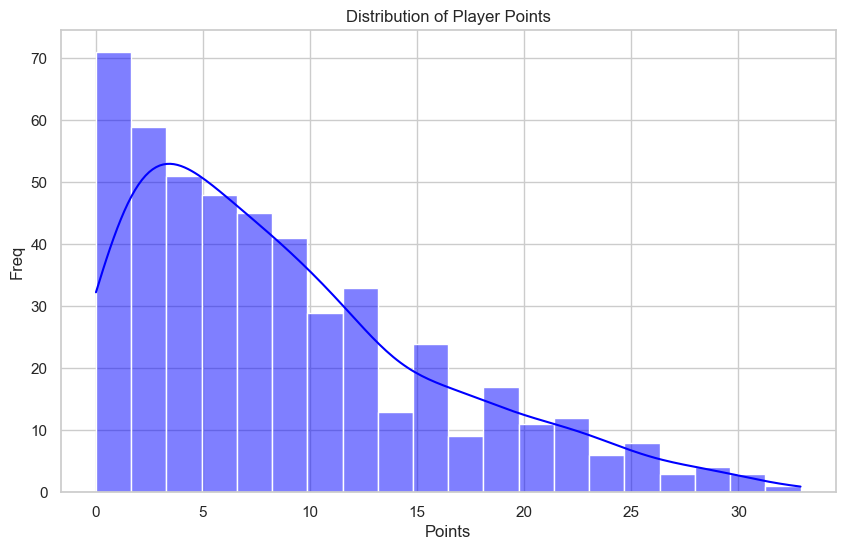

In [6]:
# Data Visualization
sns.set_theme(style="whitegrid")

# Histogram of player points
plt.figure(figsize=(10, 6))
sns.histplot(players_df['PTS'], bins=20, kde=True, color='blue')
plt.title('Distribution of Player Points')
plt.xlabel('Points')
plt.ylabel('Freq')
plt.show()

<Figure size 1400x700 with 0 Axes>

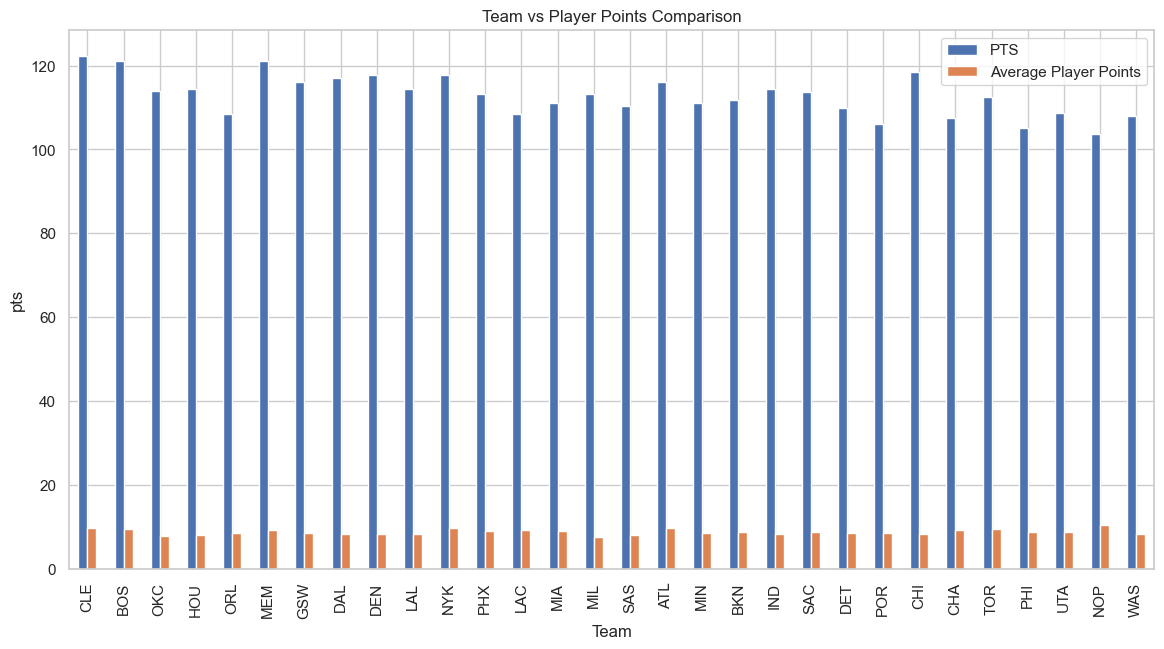

In [7]:
teams_df.head()
# Team vs Player points comparison
team_points = teams_df[['Team', 'PTS']].set_index('Team')
player_avg_points = players_df.groupby('Team')['PTS'].mean()

plt.figure(figsize=(14, 7))
team_points['Average Player Points'] = player_avg_points
team_points.plot(kind='bar', figsize=(14, 7), title='Team vs Player Points Comparison')
plt.ylabel('pts')
plt.show()

In [8]:
# # Correlation heatmap
# plt.figure(figsize=(10, 8))
# corr = combined_df.corr()
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap')
# plt.show()

In [9]:
# Outlier detection using IQR (detects points that are far or different from other points in the dataset)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = detect_outliers(players_df, 'PTS')
print("\nOutliers in Player Points:")
print(outliers)


Outliers in Player Points:
    ID                     Name Team  Age  GP   W   L   Min   PTS   FGM  ...  \
0    1    Giannis Antetokounmpo  MIL   29  17   9   8  35.2  32.9  13.2  ...   
1    2              LaMelo Ball  CHA   23  18   6  12  34.1  31.1  10.7  ...   
2    3  Shai Gilgeous-Alexander  OKC   26  19  15   4  34.5  29.8  10.4  ...   
3    4             Nikola Jokić  DEN   29  14   9   5  37.3  29.7  11.1  ...   
4    5           Paolo Banchero  ORL   22   5   3   2  36.4  29.0   9.6  ...   
5    6             Jayson Tatum  BOS   26  19  16   3  36.3  28.7   9.1  ...   
6    7            Anthony Davis  LAL   31  18  11   7  35.3  28.4  10.1  ...   
7    8              Luka Dončić  DAL   25  14   7   7  36.7  28.1   9.9  ...   
8    9             De'Aaron Fox  SAC   26  20   9  11  37.8  27.7  10.1  ...   
9   10          Anthony Edwards  MIN   23  19   9  10  37.5  27.7   9.6  ...   
10  11             Kevin Durant  PHX   36  12  10   2  37.3  26.8   9.6  ...   

     REB   

In [10]:
# Save cleaned and processed data
players_df.to_csv('./datasets/cleaned_players.csv', index=False)
teams_df.to_csv('./datasets/cleaned_teams.csv', index=False)

print("\nEDA completed. Cleaned datasets saved!")


EDA completed. Cleaned datasets saved!


In [11]:
# Identify categorical columns
categorical_cols_players = players_df.select_dtypes(include=['object']).columns
categorical_cols_teams = teams_df.select_dtypes(include=['object']).columns

print("\nCategorical Columns in Players Dataset:", categorical_cols_players.tolist())
print("Categorical Columns in Teams Dataset:", categorical_cols_teams.tolist())

# # Handle missing values in categorical columns (fill with mode)
# for col in categorical_cols_players:
#     players_df[col].fillna(players_df[col].mode()[0], inplace=True)
# 
# for col in categorical_cols_teams:
#     teams_df[col].fillna(teams_df[col].mode()[0], inplace=True)


Categorical Columns in Players Dataset: ['Name', 'Team']
Categorical Columns in Teams Dataset: ['Team']


In [12]:
# Feature engineering: Create new features from categorical data (here convert team names to team codes)
team_mapping = {name: idx for idx, name in enumerate(players_df['Team'].unique())}
players_df['team_code'] = players_df['Team'].map(team_mapping)
teams_df['team_code'] = teams_df['Team'].map(team_mapping)

In [13]:
# Encoding: Convert categorical variables into numerical formats using one-hot encoding technique
players_encoded = pd.get_dummies(players_df, columns=['Name', 'Team'], prefix='pos', drop_first=True)
teams_encoded = pd.get_dummies(teams_df, columns=['Team'], prefix='conf', drop_first=True)

In [14]:
# Scaling: Apply standardization for consistency (Scale player stats (excluding categorical/team_code))
numerical_cols_players = players_df.select_dtypes(include=['float64', 'int64']).columns
scaler_players = StandardScaler()
players_df[numerical_cols_players] = scaler_players.fit_transform(players_df[numerical_cols_players])
numerical_cols_teams = teams_df.select_dtypes(include=['float64', 'int64']).columns
scaler_teams = StandardScaler()
teams_df[numerical_cols_teams] = scaler_teams.fit_transform(teams_df[numerical_cols_teams])

In [15]:
# Final combined DataFrame for preprocessing
final_combined_df = pd.merge(players_encoded, teams_encoded, on='team_code', how='inner')
print("\nPreprocessed Combined DataFrame Overview:")
print(final_combined_df.info())
print(final_combined_df.head())
final_combined_df.to_csv('./datasets/data.csv', index=False)


Preprocessed Combined DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Columns: 601 entries, ID to conf_WAS
dtypes: bool(545), float64(46), int64(10)
memory usage: 473.4 KB
None
   ID  Age  GP_x  W_x  L_x  Min_x  PTS_x  FGM_x  FGA_x  FG%_x  ...  conf_OKC  \
0   1   29    17    9    8   35.2   32.9   13.2   21.6   60.9  ...     False   
1   2   23    18    6   12   34.1   31.1   10.7   24.9   43.0  ...     False   
2   3   26    19   15    4   34.5   29.8   10.4   20.7   50.3  ...      True   
3   4   29    14    9    5   37.3   29.7   11.1   19.5   56.8  ...     False   
4   5   22     5    3    2   36.4   29.0    9.6   19.4   49.5  ...     False   

   conf_ORL  conf_PHI  conf_PHX  conf_POR  conf_SAC  conf_SAS  conf_TOR  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False     False     False     False     False     False     False 

In [16]:
preprocessing_steps = """
### Data Preprocessing Documentation

#### 1. Raw Data Cleaning:
- Dropped duplicate rows in both datasets.
- Standardized column names to lowercase and stripped extra spaces.
- Filled missing values:
  - **Numeric columns**: Imputed using the median.
  - **Categorical columns**: Imputed using the mode.

#### 2. Handling Categorical Variables:
- Identified categorical columns: 'team', 'position', and 'conference'.
- Applied the following techniques:
  - **Imputation**: Filled missing values with the most frequent value.
  - **Feature Engineering**: Created a 'team_code' column by mapping team names to unique numeric codes.
  - **Encoding**: One-hot encoded the 'position' (players) and 'conference' (teams) columns.

#### 3. Scaling:
- Standardized all numerical features using `StandardScaler` to ensure uniformity.

#### 4. Data Merging:
- Merged the players and teams datasets on the newly created 'team_code' column for seamless integration.

#### 5. Final Dataset:
- Saved the cleaned and processed datasets as 'cleaned_players.csv', 'cleaned_teams.csv', and 'final_combined.csv' for future use.
"""

# Save the preprocessing steps to a text file
with open("preprocessing_documentation.txt", "w") as file:
    file.write(preprocessing_steps)

print("\nPreprocessing steps documented and saved to 'preprocessing_documentation.txt'.")


Preprocessing steps documented and saved to 'preprocessing_documentation.txt'.


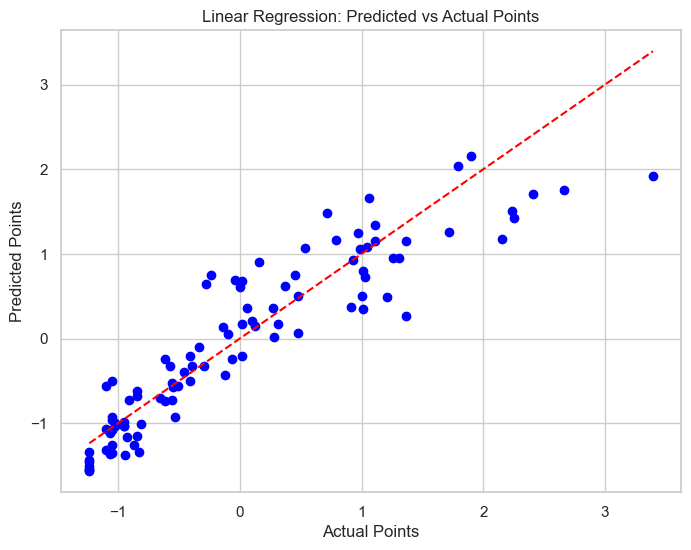

Mean Squared Error: 0.18336306269324412
R-squared: 0.838488371300854


In [17]:
# Select features and target for regression (here predicting 'points' according to other features)
X = players_df[['AST', 'REB', 'STL', 'BLK', 'TOV', 'Min', 'Age', 'GP', 'W', 'L', 'FG%']]
y = players_df['PTS']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize Linear Regression model
lin_reg = LinearRegression()

# Fit model to training data
lin_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot predicted vs actual points
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Accuracy: 0.8877551020408163

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.93      0.84      0.88        50

    accuracy                           0.89        98
   macro avg       0.89      0.89      0.89        98
weighted avg       0.89      0.89      0.89        98



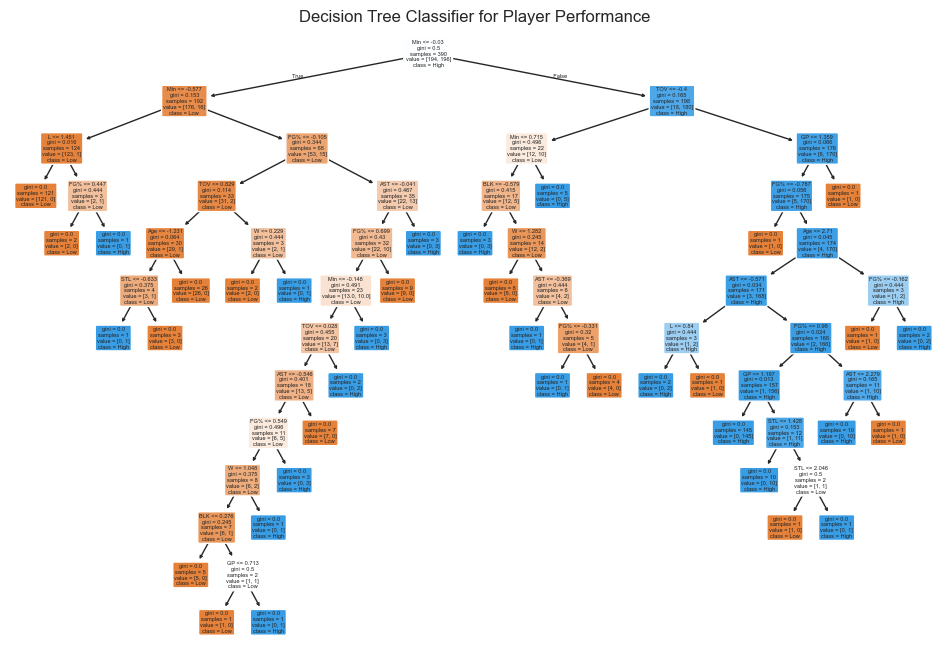

In [18]:
# Create a binary classification target based on points (high vs low performance)
median_points = players_df['PTS'].median()
players_df['performance'] = (players_df['PTS'] >= median_points).astype(int)  # 1 for High, 0 for Low

# Select features (excluding 'points' and 'performance')
X_classify = players_df[['AST', 'REB', 'STL', 'BLK', 'TOV', 'Min', 'Age', 'GP', 'W', 'L', 'FG%']]
y_classify = players_df['performance']

# Split data into training and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classify, y_classify, test_size=0.2, random_state=42)
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit model to training data
clf.fit(X_train_class, y_train_class)

# Predict on the test data
y_pred_class = clf.predict(X_test_class)

# Evaluate the classifier
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X_classify.columns, class_names=["Low", "High"], filled=True, rounded=True)
plt.title('Decision Tree Classifier for Player Performance')
plt.show()

In [19]:
# Initialize ANN (MLP Classifier)
ann_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the ANN model
ann_clf.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_ann = ann_clf.predict(X_test_class)
accuracy_ann = accuracy_score(y_test_class, y_pred_ann)

print(f"ANN Accuracy: {accuracy_ann}")
print("\nANN Classification Report:\n", classification_report(y_test_class, y_pred_ann))

ANN Accuracy: 0.9591836734693877

ANN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.96      0.96      0.96        50

    accuracy                           0.96        98
   macro avg       0.96      0.96      0.96        98
weighted avg       0.96      0.96      0.96        98



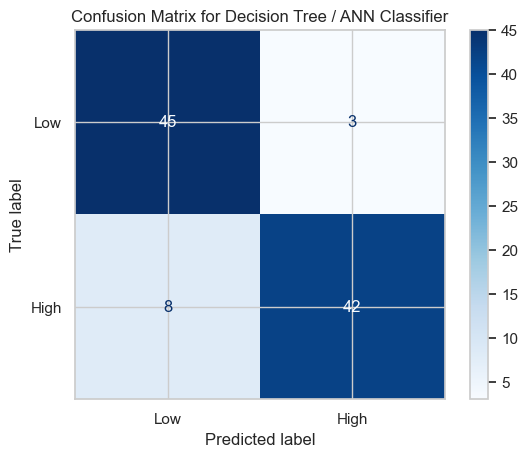

Accuracy: 0.8877551020408163


In [20]:
# Get the confusion matrix for the classification model
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Low", "High"])

# Plot confusion matrix
cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree / ANN Classifier")
plt.show()

# Display classification accuracy
accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy_class}")

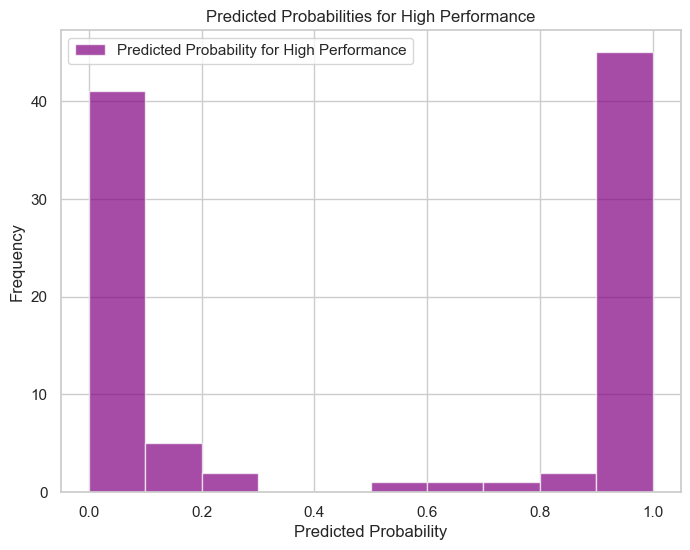

In [21]:
# Predicted probabilities for each class
y_pred_prob = ann_clf.predict_proba(X_test_class)

# Plot predicted probabilities for the 'High' class
plt.figure(figsize=(8,6))
plt.hist(y_pred_prob[:, 1], bins=10, color='purple', alpha=0.7, label='Predicted Probability for High Performance')
plt.title('Predicted Probabilities for High Performance')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [22]:
# Evaluate the regression model using MSE, RMSE, and R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
# Evaluate the classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))

Mean Squared Error (MSE): 0.18336306269324412
Root Mean Squared Error (RMSE): 0.4282091342944988
R-squared (R²): 0.838488371300854
Accuracy: 0.8877551020408163
Precision: 0.9333333333333333
Recall: 0.84
F1-Score: 0.8842105263157894

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.93      0.84      0.88        50

    accuracy                           0.89        98
   macro avg       0.89      0.89      0.89        98
weighted avg       0.89      0.89      0.89        98



In [23]:
# Save the models using pkl
os.makedirs('./models', exist_ok=True)

# Save the models using pickle
with open('./models/ann_clf.pkl', 'wb') as file:
    pickle.dump(ann_clf, file)

with open('./models/ling_reg.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)

with open('./models/clf.pkl', 'wb') as file:
    pickle.dump(clf, file)  